In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Feature engineering

- Continuous data vs Discrete data
- "niet telbaar" vs "telbaar"
- Random variable $X$: quantity that depends on a random event

### Categorical data encoding

- Nominal, e.g., {red, blue, green}
- Ordinal, e.g., {Very Important, Important, Neutral, Unimportant, Very Unimportant}

In [4]:
df = pd.DataFrame({
    'gender': ['male', 'female', 'male', 'other'],
    'color': ['Red', 'Green', 'Green', 'Blue'],
    'response': ['Agree', 'Neutral', 'Disagree', 'Agree']
})

df

,gender,color,response
0,male,Red,Agree
1,female,Green,Neutral
2,male,Green,Disagree
3,other,Blue,Agree


Nominale categorische variabelen --> One-hot encoding 

In [5]:
df_enc = pd.get_dummies(df, columns=['gender', 'color'])*1

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,Agree,0,1,0,0,0,1
1,Neutral,1,0,0,0,1,0
2,Disagree,0,1,0,0,1,0
3,Agree,0,0,1,1,0,0


Ordinale categorische variabelen --> Label encoding

In [6]:
vals, idx = pd.factorize(df_enc['response'])
vals, idx

(array([0, 1, 2, 0]), Index(['Agree', 'Neutral', 'Disagree'], dtype='object'))

In [7]:
df_enc['response'] = vals

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0
2,2,0,1,0,0,1,0
3,0,0,0,1,1,0,0


### Continuous data

(500, 2)

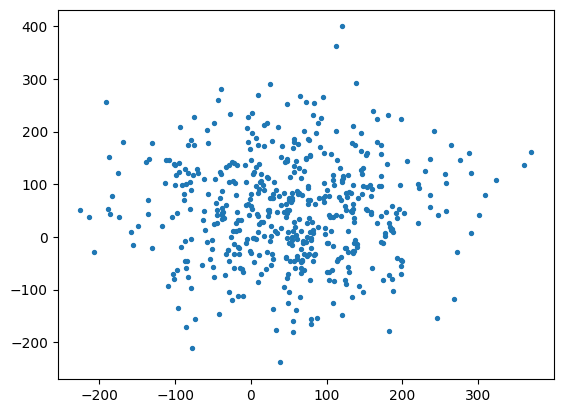

In [8]:
x = np.random.normal(loc=50, scale=100, size=(500, 2))

plt.scatter(x[:, 0], x[:, 1], s=8)

x.shape

Min-max normalisatie:
$$
    x_i' = \dfrac{x_i - \min(X)}{\max(X) - \min(X)}
$$

Effect: $\forall x_i' \implies 0 \leq x_i' \leq 1$ 

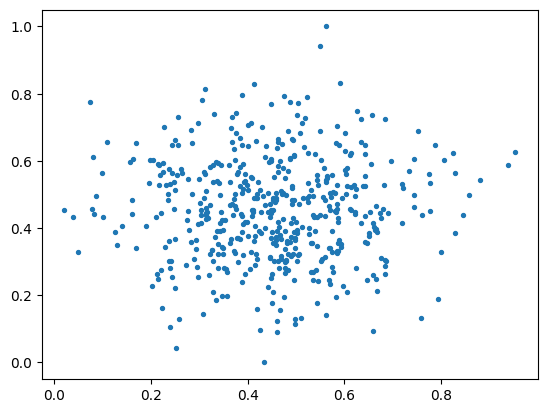

In [9]:
x_norm = (x - x.min()) / (x.max() - x.min())

plt.scatter(x_norm[:, 0], x_norm[:, 1], s=8)

Standardisation / $z$-normalisation:
$$
    z_i = \dfrac{x_i - \mu_X}{\sigma_X}
$$
waarbij:
- $\mu_X$ is het gemiddelde (mean) van $X$
- $\sigma_X$ is de standaard afwijking van $X$


Effect: gegeven $x_i \sim \mathcal{N}(\mu_X, \sigma_X)$, dan is $z_i \sim \mathcal{N}(0, 1)$

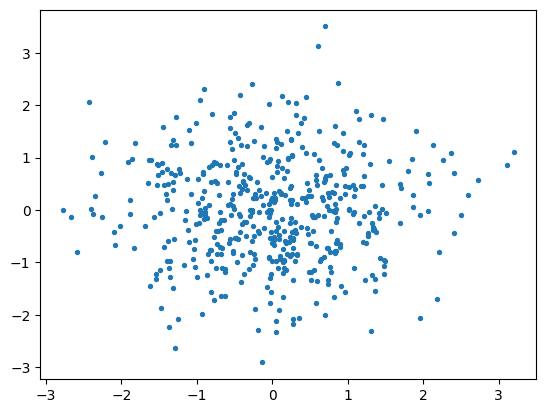

In [10]:
z = (x - x.mean()) / x.std()

plt.scatter(z[:, 0], z[:, 1], s=8)

## Principal Component Analysis

Het probleem:
- Veel variabelen/features zorgen voor veel **dimensies**
- Hoe meer dimensies, hoe meer data benodigd is om de "lege ruimte" te vullen
- Zoveel data hebben we niet (altijd)


Oplossing: reduceren van dimensies met bijv. PCA
- Unsupervised (we gebruiken geen outputs/labels/y-waarden)
- PCA projecteert $d$-dimensionale data naar een $(k < d)$-dimensionale ruimte zodanig dat de variantie maximaal is.
- Nadeel: projecties zijn niet meer interpreteerbaar 
- https://setosa.io/ev/principal-component-analysis/

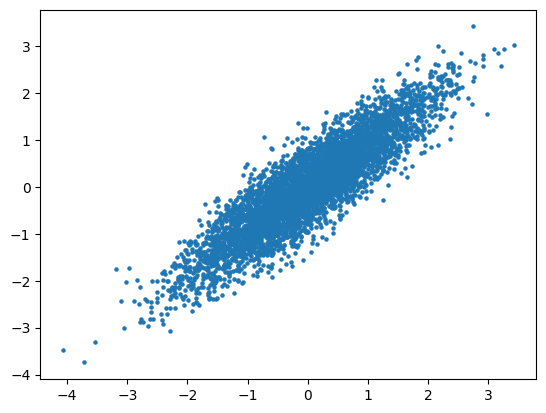

In [69]:
d = 2 # dimensionality of data

mean = [0, 0]
cov = [
    [1, 0.9], 
    [0.9, 1]
]
x = np.random.multivariate_normal(mean=mean, cov=cov, size=(5000,))

plt.scatter(x[:, 0], x[:, 1], s=5)

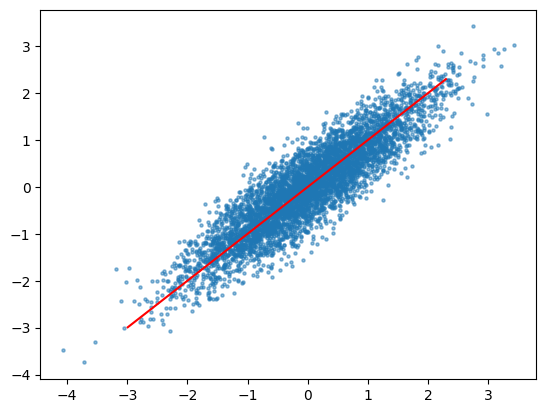

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(x)
x_proj = pca.transform(x)

fig, ax = plt.subplots(1, 1)
ax.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

mean = x.mean()
pc1x = pca.components_[0, 0] + mean
pc1y = pca.components_[0, 1] + mean
ax.plot([mean-3, pc1x+3], [mean-3, pc1y+3], c='r')

{'I': 0.81642051634484, 'II': 0.8162365060002428, 'III': 0.8162867394895982, 'IV': 0.8165214368885031}


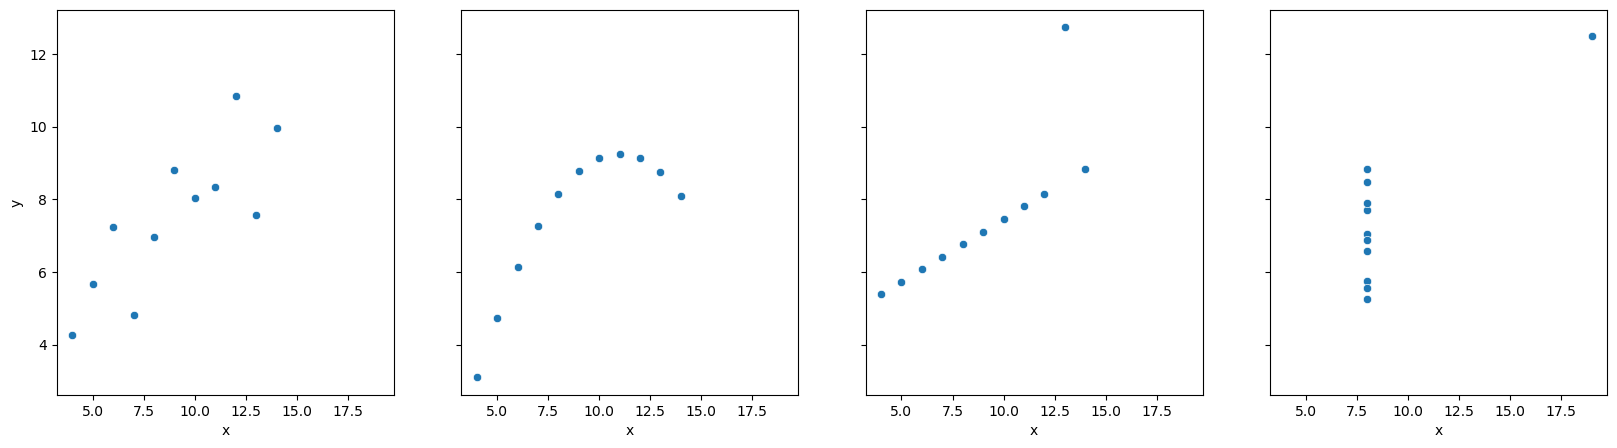

In [2]:
df = pd.read_csv("./datasets/anscombes.csv")
dataset_ids = list(df.dataset.unique())

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
corrs = {}

for i, id in enumerate(dataset_ids):
    dataset = df[df['dataset'] == id]
    sns.scatterplot(ax=axes[i], x=dataset["x"], y=dataset["y"])
    corrs[id] = np.corrcoef(dataset["x"], dataset["y"])[0, 1]

print(corrs)
plt.show()

$$
    2x + 4x + 8x \implies 2x(1+2+4) \implies 2x(7)
$$

Percentage of variance explainer [0.90818312 0.09181688]
Singular values [8.83763251 2.81002697]


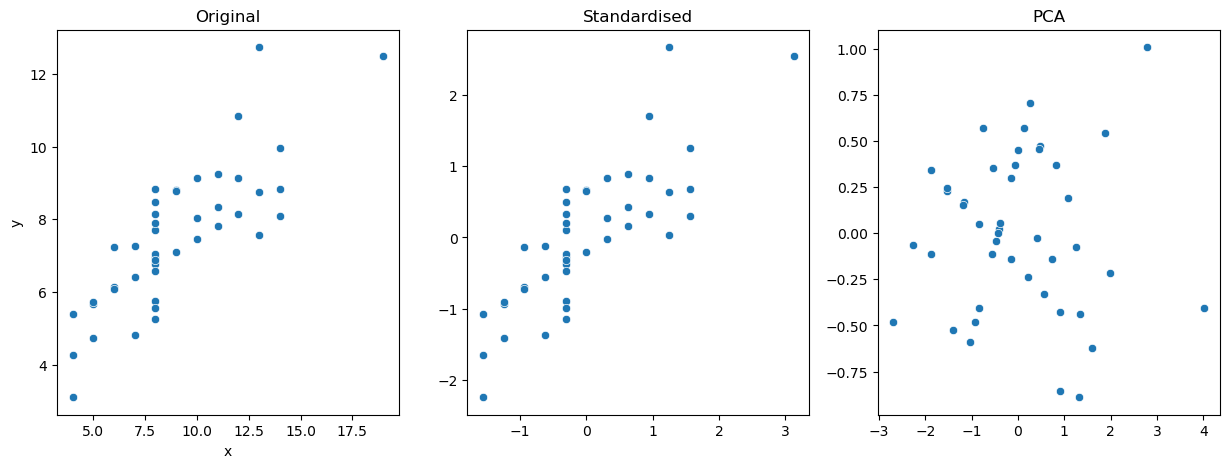

In [3]:
from sklearn.decomposition import PCA

dataset = df[["x", "y"]]

# Standardize data
dataset2 = (dataset - dataset.mean())/dataset.std()

# Apply PCA
dataset2 = dataset2.to_numpy()
pca = PCA(n_components=2).fit(dataset2)
print("Percentage of variance explained", pca.explained_variance_ratio_)
print("Singular values", pca.singular_values_)
dataset3 = pca.transform(dataset2)

# Compare results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x=dataset['x'], y=dataset['y'])
sns.scatterplot(ax=axes[1], x=dataset2[:, 0], y=dataset2[:, 1])
sns.scatterplot(ax=axes[2], x=dataset3[:, 0], y=dataset3[:, 1])
axes[0].set_title('Original')
axes[1].set_title('Standardised')
axes[2].set_title('PCA')

plt.show()

<Axes: >

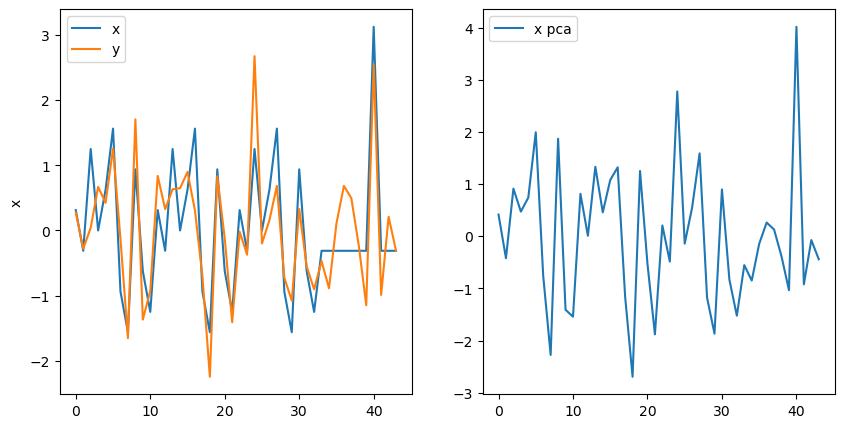

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

std_df = pd.DataFrame(dataset2, columns=['x', 'y'])
pca_df = pd.DataFrame(PCA(n_components=1).fit_transform(dataset2), columns=["x pca"])

sns.lineplot(ax=axes[0], data=std_df['x'], label="x")
sns.lineplot(ax=axes[0], data=std_df['y'], label="y")
sns.lineplot(ax=axes[1], data=pca_df)

In [5]:
from sklearn.decomposition import PCA

pcas = []

for id in dataset_ids:
    dataset = df[df['dataset'] == id][['x', 'y']].to_numpy()
    dataset = (dataset - dataset.mean())/dataset.std()
    
    pcas.append(PCA(n_components=1).fit(dataset))

# For each dataset, most of the variance (~93%) is explained by just the first principal component 
[pca.explained_variance_ratio_ for pca in pcas]

[array([0.92876932]),
 array([0.92869675]),
 array([0.92875833]),
 array([0.92884159])]

In [6]:
df = pd.read_csv("./datasets/data_dc2.csv", index_col=0)

df.head(10)

,x,y,class
0,-1.679040,500.804975,2.0
1,-1.045952,501.360254,1.0
2,-1.120480,501.528549,1.0
3,-1.689251,498.098798,2.0
4,-0.929261,501.025551,1.0
5,-1.136165,499.969329,2.0
6,-0.904275,502.202581,1.0
7,-0.050320,502.088451,0.0
8,-1.316405,499.695469,2.0
9,-0.583078,501.082139,0.0


<Axes: xlabel='x', ylabel='y'>

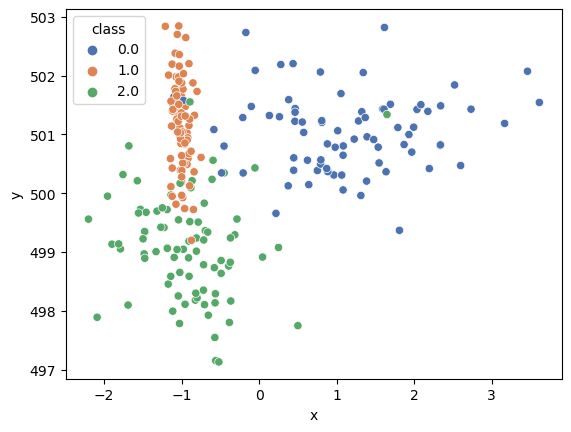

In [7]:
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='deep')

[Text(0, 0, '1.10804'), Text(0, 0, '-1.00228'), Text(0, 0, '-0.925567')]

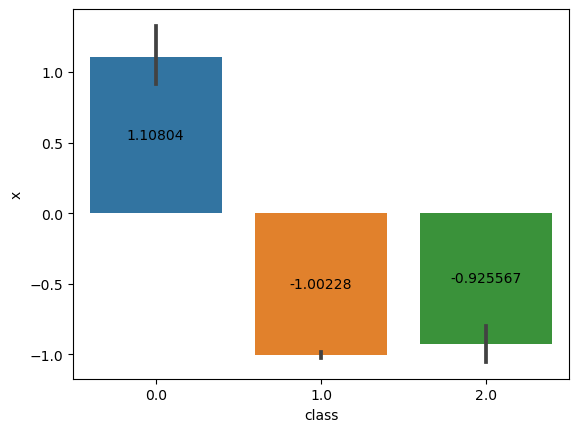

In [8]:
ax = sns.barplot(data=df, x='class', y='x')
ax.bar_label(ax.containers[0], fontsize=10, label_type='center')

In [74]:
svd = np.linalg.svd(df)

In [84]:
rank = 2

# sigma 240 x 3 matrix
sigma = np.zeros((svd.U.shape[0], svd.S.shape[0]))

# voeg singular values toe aan de diagonaal
for i in range(rank):
    sigma[i, i] = svd.S[i]

# PCA transformatie met rank als aantal componenten 
svd.U @ sigma @ svd.Vh[:, :rank]

array([[-1.73596724e+00,  5.00805132e+02],
       [-8.29815248e-01,  5.01359661e+02],
       [-8.83859570e-01,  5.01527899e+02],
       [-1.74541908e+00,  4.98098952e+02],
       [-7.45250784e-01,  5.01025046e+02],
       [-1.34200973e+00,  4.99969894e+02],
       [-7.26206852e-01,  5.02202092e+02],
       [ 3.39978560e-01,  5.02087379e+02],
       [-1.47322141e+00,  4.99695900e+02],
       [-4.80073980e-02,  5.01080670e+02],
       [-7.68648799e-01,  4.99738900e+02],
       [-7.36294625e-01,  5.00590974e+02],
       [-8.47159141e-01,  5.01978087e+02],
       [ 7.13761638e-01,  5.01439364e+02],
       [ 9.21516760e-01,  5.00385699e+02],
       [ 7.11200220e-01,  5.01222519e+02],
       [-8.21329797e-01,  5.01712223e+02],
       [-1.11510596e+00,  4.98182558e+02],
       [-4.21972971e-01,  5.01638077e+02],
       [ 1.55167976e+00,  5.02818554e+02],
       [-1.16559752e+00,  4.99517515e+02],
       [ 1.07584128e+00,  5.00309888e+02],
       [ 1.53370038e+00,  5.01432280e+02],
       [ 3.

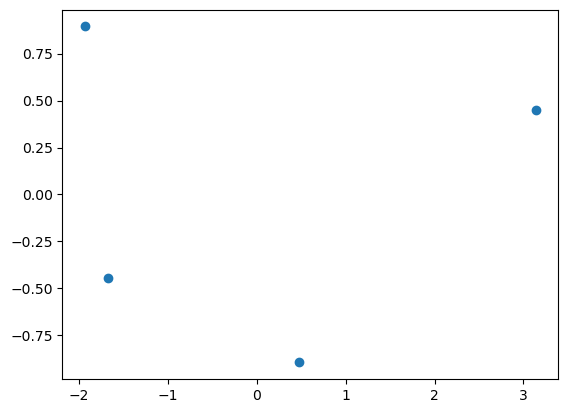

In [86]:
D = np.array([
    [2, 3, 1], 
    [3, 5, 1], 
    [4, 5, 2], 
    [1, 1, 3]
])

pca_D = PCA(n_components=2).fit_transform(D)
plt.scatter(pca_D[:, 0], pca_D[:, 1])

In [95]:
svd_D = np.linalg.svd(D-D.mean(axis=0))

rank = 2

# sigma 240 x 3 matrix
sigma = np.zeros((svd_D.U.shape[0], svd_D.S.shape[0]))

# voeg singular values toe aan de diagonaal
for i in range(rank):
    sigma[i, i] = svd_D.S[i]

# transformatie met rank als aantal componenten 
D_approx = svd_D.U @ sigma @ svd_D.Vh[:, :rank]

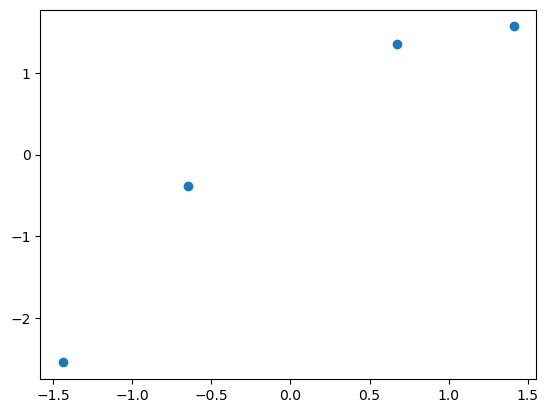

In [96]:
plt.scatter(D_approx[:, 0], D_approx[:, 1])

In [89]:
pca_D

array([[ 0.47118183, -0.89442719],
       [-1.67469691, -0.4472136 ],
       [-1.93584833,  0.89442719],
       [ 3.13936341,  0.4472136 ]])